In [1]:
#Function that predicts the n-day stock return based on the given parameters
import pandas as pd
import numpy as np
stock_df = pd.read_csv('data/adjusted_stock_data.csv')
 
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [2]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Description', 'Symbol', 'Company Name',
       'Market capitalization as on March 28, 2024\n(In lakhs)'],
      dtype='object')

In [3]:
stock_df.isna().sum()

Date                                                           0
Open                                                           0
High                                                           0
Low                                                            0
Close                                                          0
Adj Close                                                      0
Volume                                                    292717
Description                                                    0
Symbol                                                         0
Company Name                                                   0
Market capitalization as on March 28, 2024\n(In lakhs)    103692
dtype: int64

In [4]:
dividend_rows =  pd.read_csv('data/dividend_rows.csv')
dividend_rows['Date'] = pd.to_datetime(dividend_rows['Date'])
dividend_rows.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company Name_x,Ticker,Company Name_y,Description,Symbol,Company Name,"Market capitalization as on March 28, 2024\n(In lakhs)"
0,2023-08-21,9.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
1,2022-08-18,8.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
2,2021-06-11,7.00Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
3,2020-07-02,6.50Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08
4,2019-08-02,6.44Dividend,NaN,NaN,NaN,NaN,NaN,Reliance Industries Limited,RELIANCE,Reliance Industries Limited,Reliance Industries Limited engages in hydroca...,RELIANCE,Reliance Industries Limited,2.010560e+08


In [5]:
dividend_rows.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company Name_x', 'Ticker', 'Company Name_y', 'Description', 'Symbol',
       'Company Name',
       'Market capitalization as on March 28, 2024\n(In lakhs)'],
      dtype='object')

In [6]:
dividend_rows.isna().sum()

Date                                                          0
Open                                                          0
High                                                      21651
Low                                                       21651
Close                                                     21651
Adj Close                                                 21651
Volume                                                    21651
Company Name_x                                                0
Ticker                                                        0
Company Name_y                                                0
Description                                                   0
Symbol                                                        0
Company Name                                                  0
Market capitalization as on March 28, 2024\n(In lakhs)       79
dtype: int64

In [8]:
# Assuming dividend_rows is your DataFrame containing the tickers
unique_tickers = dividend_rows['Ticker'].unique()  # Replace 'ticker' with the correct column name if different
print(unique_tickers)

['RELIANCE' 'TCS' 'HDFCBANK' ... 'VISASTEEL' 'GICHSGFIN' 'ALLSEC']


In [9]:
# Check if the symbols and dates match between datasets
common_symbols = set(stock_df['Symbol']).intersection(set(dividend_rows['Symbol']))
print(f"Number of common symbols: {len(common_symbols)}")

Number of common symbols: 1536


In [10]:
analyst_ratings =  pd.read_csv('data/2000_analysts_og.csv')
analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'])
analyst_ratings.head()

C:\Users\disch\AppData\Local\Temp\ipykernel_11012\1269458253.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'])


,Unnamed: 0,date,stock_name,author,ltp,target,price_at_reco,upside%,type,pdf_url
0,45319,2024-07-29,havells-india-ltd,Geojit BNP Paribas\nReco Target,1988.05,1644.0,1837.60\n(8.19%),17.31,Sell,https://trendlyne.com/get-document/report/pdf/...
1,45320,2024-07-21,havells-india-ltd,Anand Rathi\nTarget,1988.05,2146.0,1768.50\n(12.41%),7.94,Buy,https://trendlyne.com/get-document/report/pdf/...
2,45321,2024-07-19,havells-india-ltd,Keynote Capitals Ltd\nReco Target,1988.05,1720.0,1768.50\n(12.41%),Target met,Sell,https://trendlyne.com/get-document/report/pdf/...
3,45322,2024-07-19,havells-india-ltd,Prabhudas Lilladhar\nTarget,1988.05,1976.0,1768.50\n(12.41%),Target met,Accumulate,https://trendlyne.com/get-document/report/pdf/...
4,45323,2024-06-05,havells-india-ltd,BOB Capital Markets Ltd.,1988.05,1780.0,1792.80\n(10.89%),Target met,Hold,https://trendlyne.com/get-document/report/pdf/...


In [11]:
analyst_ratings.columns

Index(['Unnamed: 0', 'date', 'stock_name', 'author', 'ltp', 'target',
       'price_at_reco', 'upside%', 'type', 'pdf_url'],
      dtype='object')

In [12]:
analyst_ratings.isna().sum()

Unnamed: 0         0
date               0
stock_name         0
author             0
ltp                0
target            72
price_at_reco     16
upside%          219
type              13
pdf_url           34
dtype: int64

In [13]:
# Data Preprocessing
# Fill missing values using forward fill
stock_df['Volume'] = stock_df['Volume'].ffill()
stock_df['Market capitalization as on March 28, 2024\n(In lakhs)'] = stock_df['Market capitalization as on March 28, 2024\n(In lakhs)'].ffill()

In [15]:
# Fill missing values for dividend data
dividend_rows = dividend_rows.ffill()

In [16]:
analyst_ratings["upside%"]

0           17.31
1            7.94
2      Target met
3      Target met
4      Target met
          ...    
753    Target met
754    Target met
755    Target met
756    Target met
757    Target met
Name: upside%, Length: 758, dtype: object

In [17]:
def clean_price_at_reco(price):
    percentage = None  # Initialize percentage as None

    # Check if the price is a string
    if isinstance(price, str):
        # Split the string by newline
        parts = price.split('\n')
        
        # Check if we have at least two parts
        if len(parts) >= 2:
            # Take the first part as price and second as percentage
            price = parts[0]
            percentage = parts[1]
            
        # Attempt to convert to numeric, ignoring any errors
        price = pd.to_numeric(price, errors='coerce')
    
    return price, percentage
    
# Apply the cleaning function to the 'price_at_reco' column and collect results
analyst_ratings[['cleaned_price_at_reco', 'percentage']] = analyst_ratings['price_at_reco'].apply(
    lambda x: pd.Series(clean_price_at_reco(x))
)

# Print the cleaned DataFrame
print(analyst_ratings[['price_at_reco', 'cleaned_price_at_reco', 'percentage']].head())

       price_at_reco  cleaned_price_at_reco percentage
0   1837.60\n(8.19%)                 1837.6    (8.19%)
1  1768.50\n(12.41%)                 1768.5   (12.41%)
2  1768.50\n(12.41%)                 1768.5   (12.41%)
3  1768.50\n(12.41%)                 1768.5   (12.41%)
4  1792.80\n(10.89%)                 1792.8   (10.89%)


In [18]:
# Apply the function to each row
# analyst_ratings = analyst_ratings.apply(clean_upside_column, axis=1)

In [19]:
# Convert the cleaned columns to numeric
# analyst_ratings['price_at_reco'] = pd.to_numeric(analyst_ratings['price_at_reco'], errors='coerce')
# analyst_ratings['upside%'] = pd.to_numeric(analyst_ratings['upside%'], errors='coerce')

In [20]:
# Fill any missing values or handle NaN as required
# analyst_ratings['upside%'] = analyst_ratings['upside%'].fillna(0)

# Print the cleaned DataFrame
analyst_ratings.head()

,Unnamed: 0,date,stock_name,author,ltp,target,price_at_reco,upside%,type,pdf_url,cleaned_price_at_reco,percentage
0,45319,2024-07-29,havells-india-ltd,Geojit BNP Paribas\nReco Target,1988.05,1644.0,1837.60\n(8.19%),17.31,Sell,https://trendlyne.com/get-document/report/pdf/...,1837.6,(8.19%)
1,45320,2024-07-21,havells-india-ltd,Anand Rathi\nTarget,1988.05,2146.0,1768.50\n(12.41%),7.94,Buy,https://trendlyne.com/get-document/report/pdf/...,1768.5,(12.41%)
2,45321,2024-07-19,havells-india-ltd,Keynote Capitals Ltd\nReco Target,1988.05,1720.0,1768.50\n(12.41%),Target met,Sell,https://trendlyne.com/get-document/report/pdf/...,1768.5,(12.41%)
3,45322,2024-07-19,havells-india-ltd,Prabhudas Lilladhar\nTarget,1988.05,1976.0,1768.50\n(12.41%),Target met,Accumulate,https://trendlyne.com/get-document/report/pdf/...,1768.5,(12.41%)
4,45323,2024-06-05,havells-india-ltd,BOB Capital Markets Ltd.,1988.05,1780.0,1792.80\n(10.89%),Target met,Hold,https://trendlyne.com/get-document/report/pdf/...,1792.8,(10.89%)


In [21]:
# Clean 'price_at_reco' and 'target' to extract numeric values
analyst_ratings['cleaned_price_at_reco'] = analyst_ratings['cleaned_price_at_reco'].astype(float)
analyst_ratings['target'] = analyst_ratings['target'].astype(float)

# Calculate expected return
analyst_ratings['expected_return'] = ((analyst_ratings['target'] - analyst_ratings['cleaned_price_at_reco']) / analyst_ratings['cleaned_price_at_reco']) * 100

In [22]:
analyst_ratings['expected_return']

0     -10.535481
1      21.345773
2      -2.742437
3      11.733107
4      -0.713967
         ...    
753    17.478510
754    38.194312
755    19.850187
756    27.757353
757    21.821407
Name: expected_return, Length: 758, dtype: float64

In [23]:
import sys
import os

# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Append the directory of your script
sys.path.append(os.path.join(current_dir, 'Project-1'))

from nday_stockprediction import predict_n_day_return

Warnings:
Data not available for 2024-06-05 00:00:00. Nearest available date is 2024-06-06.

Start Price on 2024-05-31 00:00:00: 2862.6
End Price on 2024-06-06 00:00:00: 2863.2
Total Return over 5 days: 0.02%


In [24]:
# Example usage
result = predict_n_day_return(ticker='HDFCBANK', date_d='2024-05-30', n=5, stock_df=stock_df, dividend_df=dividend_rows)
print(result)

(1519.0, 1559.7, 0.026793943383805165, Timestamp('2024-05-31 00:00:00'), Timestamp('2024-06-06 00:00:00'), 'Data not available for 2024-06-05 00:00:00. Nearest available date is 2024-06-06.\n')


In [25]:
# Prepare to store actual returns
actual_returns = []  # List to store actual returns for each analyst rating

# Loop through each row of the analyst ratings
for index, row in analyst_ratings.iterrows():
    date_d = row['date']  
    
    # Get the ticker from the dividend_rows DataFrame for the same date
    matched_tickers = dividend_rows[dividend_rows['Date'] == date_d]['Ticker'] 

    if not matched_tickers.empty:
        ticker = matched_tickers.iloc[0] 
    else:
        ticker = None  # No ticker found for this date
    
    n_days = 5 
    
    # Only call the function if a ticker was found
    if ticker:
        try:
            _, _, total_return, _, _, _ = predict_n_day_return(ticker, date_d, n_days, stock_df, dividend_rows)
            actual_returns.append(total_return)  # Append the result to the list
        except Exception as e:
            actual_returns.append(None)  # Append None if there's an error
            print(f"Error for {ticker} on {date_d}: {e}")
    else:
        actual_returns.append(None)  # No ticker found

# Add the actual returns as a new column in the analyst ratings DataFrame
analyst_ratings['actual_return'] = actual_returns


Error for NFL on 2019-02-13 00:00:00: Reference date 2019-02-13 00:00:00 not found for ticker NFL.
Error for NFL on 2019-02-13 00:00:00: Reference date 2019-02-13 00:00:00 not found for ticker NFL.


In [26]:
actual_returns

[-0.013947207393496879,
 None,
 0.020442098163932266,
 0.020442098163932266,
 0.08641176470588234,
 None,
 -0.06120745022479124,
 -0.06120745022479124,
 -0.06120745022479124,
 -0.06120745022479124,
 None,
 None,
 None,
 -0.012360939431396786,
 -0.01579337007485403,
 -0.01579337007485403,
 -0.014015270369208218,
 0.012146626539170226,
 0.013421474358974358,
 0.013421474358974358,
 0.013421474358974358,
 0.013421474358974358,
 None,
 -0.0009210526315789074,
 -0.014156508061344868,
 -0.014156508061344868,
 -0.014156508061344868,
 -0.0021004391827382355,
 -0.0021004391827382355,
 0.023312222072496905,
 -0.018434041280287236,
 -0.0037307692307692775,
 0.027707407461022966,
 None,
 -0.010377094972067064,
 -0.010377094972067064,
 None,
 None,
 -0.007950530035335739,
 0.004095225237388016,
 -0.0656652360515022,
 -0.07465517241379302,
 0.010949243759858987,
 0.010949243759858987,
 None,
 -0.03634268956849595,
 0.06722166662161805,
 -0.04877777777777775,
 0.020249221183800622,
 0.057655954631379

In [27]:
# import pandas as pd

# # Assume you have a DataFrame `analyst_ratings` with expected returns
# # and a new column 'actual_return' that holds the result from your function
# analyst_ratings['actual_return'] = result[2] 

# # Calculate correlation
# correlation = analyst_ratings[['expected_return', 'actual_return']].corr().iloc[0, 1]
# print(f"Correlation between expected returns and actual returns: {correlation}")


Correlation between expected returns and actual returns: nan


In [31]:
print(analyst_ratings[['stock_name','date', 'actual_return']])

              stock_name       date  actual_return
0      havells-india-ltd 2024-07-29       0.026794
1      havells-india-ltd 2024-07-21       0.026794
2      havells-india-ltd 2024-07-19       0.026794
3      havells-india-ltd 2024-07-19       0.026794
4      havells-india-ltd 2024-06-05       0.026794
..                   ...        ...            ...
753  rain-industries-ltd 2017-11-08       0.026794
754  rain-industries-ltd 2017-11-01       0.026794
755  rain-industries-ltd 2017-08-14       0.026794
756  rain-industries-ltd 2017-05-08       0.026794
757  rain-industries-ltd 2017-02-27       0.026794

[758 rows x 3 columns]


In [ ]:
#  Something is off here, the actual returns list and column are diff, maybe its not collating properly

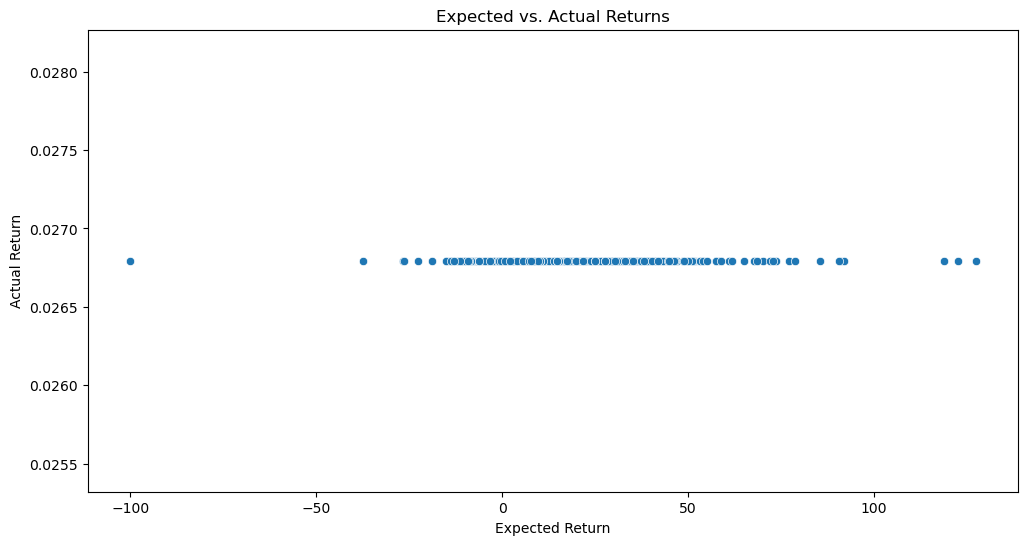

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=analyst_ratings, x='expected_return', y='actual_return')
plt.title('Expected vs. Actual Returns')
plt.xlabel('Expected Return')
plt.ylabel('Actual Return')
plt.show()
